In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from pandas.plotting import scatter_matrix

In [267]:
import pandas as pd
import numpy as np

In [268]:
df = pd.read_csv("date_simple.csv")

In [269]:
del(df["date"])

In [270]:
df.head()

,covidOccupiedMVBeds,hospitalCases,VaccineRegisterPopulationByVaccinationDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDateRate,newDeaths60DaysByDeathDate,newVirusTestsBySpecimenDate
0,0.00000,1580.00000,0.00000,1215.00000,51.70000,102.00000,8463.00000
1,0.00000,2152.00000,0.00000,1162.00000,56.20000,112.00000,8442.00000
2,0.00000,2670.00000,0.00000,1348.00000,82.90000,153.00000,7087.00000
3,0.00000,3183.00000,0.00000,2263.00000,93.40000,171.00000,11075.00000
4,0.00000,3598.00000,0.00000,2318.00000,116.60000,215.00000,11255.00000


In [271]:
target = "covidOccupiedMVBeds"
inputs = [x for x in df.columns if x != target]

In [272]:
model = LinearRegression().fit(df[inputs], df[target])
# model = DecisionTreeRegressor().fit(df[inputs], df[target])
model = MLPRegressor(verbose = True, hidden_layer_sizes=(50, 50, 50)).fit(df[inputs], df[target])

Iteration 1, loss = 1131591927841.03320312
Iteration 2, loss = 389178303010.24237061
Iteration 3, loss = 117961112309.02420044
Iteration 4, loss = 142285418188.48645020
Iteration 5, loss = 66382685195.62350464
Iteration 6, loss = 29917591595.13587570
Iteration 7, loss = 18319751332.06901169
Iteration 8, loss = 19717210706.50481033
Iteration 9, loss = 3500943323.83906746
Iteration 10, loss = 9722008460.14604568
Iteration 11, loss = 2013084017.61803079
Iteration 12, loss = 3069735675.72500372
Iteration 13, loss = 867903107.96297395
Iteration 14, loss = 428349235.91769481
Iteration 15, loss = 318141056.04477543
Iteration 16, loss = 218257329.26550195
Iteration 17, loss = 181153872.49172890
Iteration 18, loss = 153265392.06559485
Iteration 19, loss = 133898119.54867883
Iteration 20, loss = 123283769.11556368
Iteration 21, loss = 111191820.13133606
Iteration 22, loss = 102571982.42460173
Iteration 23, loss = 101619528.75022157
Iteration 24, loss = 102198851.82945727
Iteration 25, loss = 979

In [273]:
df["preds"] = model.predict(df[inputs])

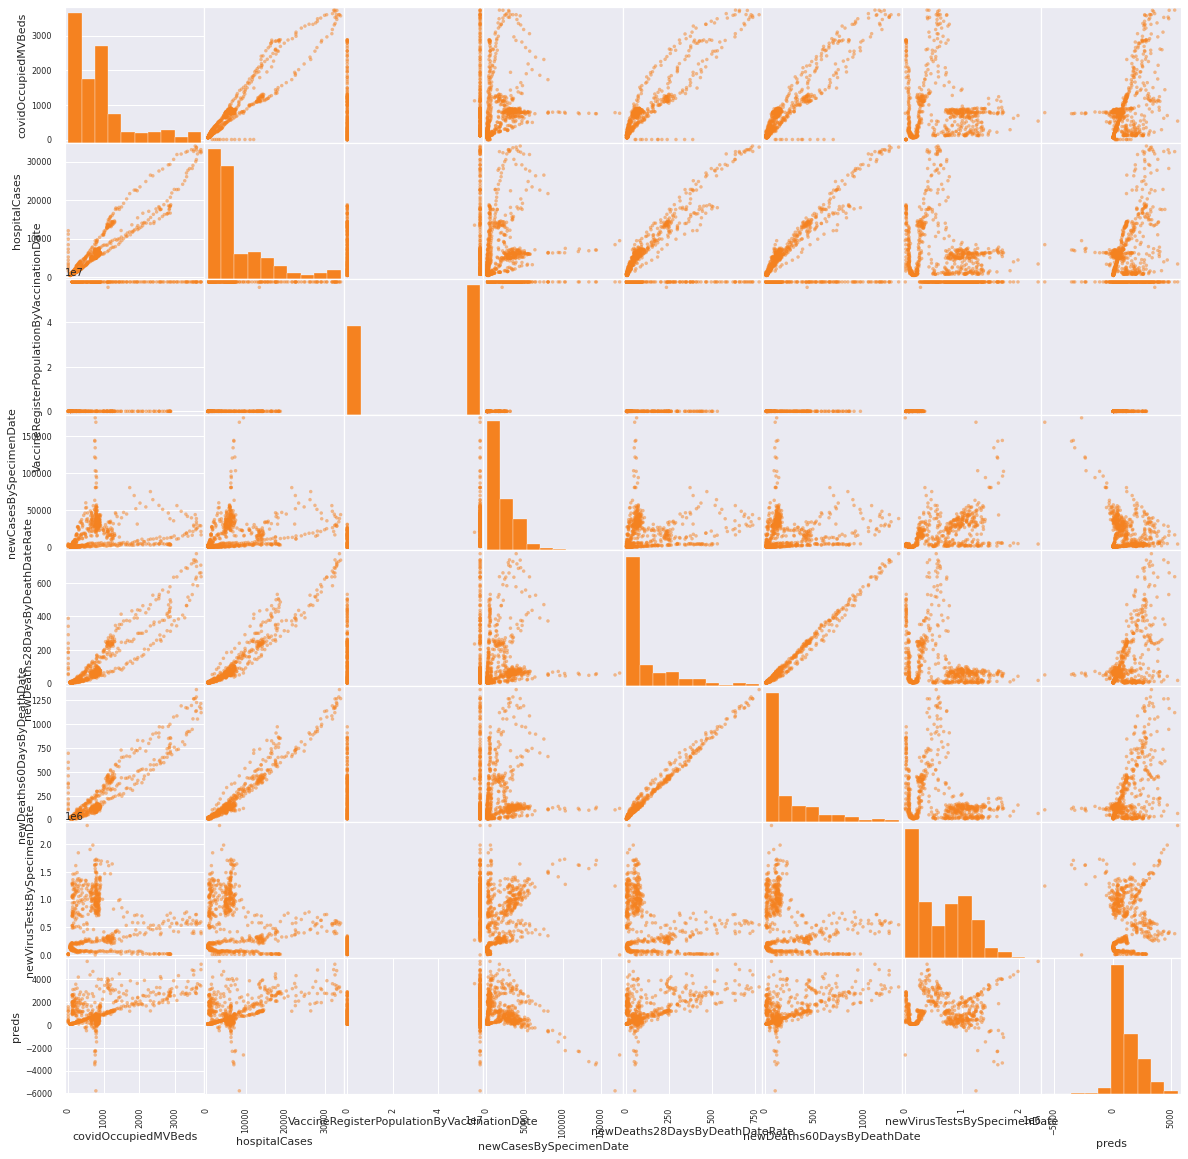

In [274]:
_ = scatter_matrix(df, figsize = (20, 20))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='preds', ylabel='covidOccupiedMVBeds'>

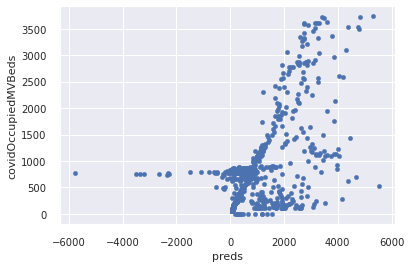

In [275]:
df.plot.scatter("preds", target)

In [276]:
inputs

['hospitalCases',
 'VaccineRegisterPopulationByVaccinationDate',
 'newCasesBySpecimenDate',
 'newDeaths28DaysByDeathDateRate',
 'newDeaths60DaysByDeathDate',
 'newVirusTestsBySpecimenDate']

In [277]:
import ipywidgets as widgets

In [278]:
w = widgets.IntSlider()
display(w)
print(w.value)


IntSlider(value=0)

0


In [279]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))

In [280]:
a = widgets.IntSlider(description=inputs[0], min = df[inputs[0]].min(), max = df[inputs[0]].max())
b = widgets.IntSlider(description=inputs[1], min = df[inputs[1]].min(), max = df[inputs[1]].max())
c = widgets.IntSlider(description=inputs[2], min = df[inputs[2]].min(), max = df[inputs[2]].max())
d = widgets.IntSlider(description=inputs[3], min = df[inputs[3]].min(), max = df[inputs[3]].max())
e = widgets.IntSlider(description=inputs[4], min = df[inputs[4]].min(), max = df[inputs[4]].max())
f = widgets.IntSlider(description=inputs[5], min = df[inputs[5]].min(), max = df[inputs[5]].max())
def func(a, b, c, d, e, f):
    
    res = model.predict(pd.DataFrame({inputs[0]: a,
 inputs[1]: b,
 inputs[2]: d,
 inputs[3]: d,
 inputs[4]: e,
 inputs[5]: f}, index = [1]))
    
    print(f'{a}, {b}, {c}, {d}, {e}, {f}: {res}')

out = widgets.interactive_output(func, {'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f})
comp = widgets.HBox([widgets.VBox([a, b, c, d, e, f]), out])
display(comp)

In [281]:
comp.close()

In [282]:
def fiddle(df, model, inputs, target): 

    widget_list = {n: widgets.IntSlider(description=n, 
                                        min = df[n].min(), 
                                        max = df[n].max(), 
#                                         style = {'description_width': 'initial'},
                                       ) for n in inputs}

    def func(**widget_list):
    #     [a,b,c,d,e,f] = [widget_list[x] for x in widget_list]

        res = model.predict(pd.DataFrame(widget_list, index = [1]))

        for x in widget_list: 
            print(f'{x}: {widget_list[x]}')
        print(f'{target}: {res}')


    out = widgets.interactive_output(func, widget_list)
    comp = widgets.HBox([widgets.VBox([widget_list[x] for x in widget_list]), out])
    display(comp)

In [283]:
fiddle(df, model, inputs, target)

for the value of all but one variable, can we sweep the returned values? 

In [284]:
widget_list = {n: widgets.IntSlider(description=n, min = df[n].min(), max = df[n].max()) for n in inputs}

def func(**widget_list):
#     [a,b,c,d,e,f] = [widget_list[x] for x in widget_list]
    
    res = model.predict(pd.DataFrame(widget_list, index = [1]))
    
    for x in widget_list: 
        print(f'{x}: {widget_list[x]}')
    print(f'{target}: {res}')
    
        # print(comp.children[0])
    set_values = {}
    for x in comp.children[0].children: 
        set_values[x.description] = x.value
    #     print(x.description)
    #     print(x.value)
    
    sample_n = 100

    for sweep in inputs: 
    # sweep = inputs[1]
        sample = df[sweep].drop_duplicates().sample(np.array([len(df[sweep].drop_duplicates()), sample_n]).min()).sort_values().to_frame()
        for x in set_values:
            if x != sweep: 
                sample[x] = set_values[x]

        sample["preds"] = model.predict(sample)
        sample.set_index(sweep)["preds"].plot(figsize = (10,1), xlabel = "")
        plt.show()
    #     display(sample.set_index(sweep)["preds"])



out = widgets.interactive_output(func, widget_list)
comp = widgets.HBox([widgets.VBox([widget_list[x] for x in widget_list]), out])
display(comp)

In [285]:
# comp.close()

In [286]:
# sample_n = 100

# for sweep in inputs: 
# # sweep = inputs[1]
#     sample = df[sweep].drop_duplicates().sample(np.array([len(df[sweep].drop_duplicates()), sample_n]).min()).sort_values().to_frame()
#     for x in set_values:
#         if x != sweep: 
#             sample[x] = set_values[x]

#     sample["preds"] = model.predict(sample)
#     sample.set_index(sweep)["preds"].plot(
#         figsize = (10,1), 
#         xlabel = "", 
#     )

#     plt.show()
# #     display(sample.set_index(sweep)["preds"])

In [287]:
sample.set_index(sweep)["preds"]

newVirusTestsBySpecimenDate
46913.00000      11158.80222
50940.00000      12114.78323
51099.00000      12152.52869
52146.00000      12401.07907
58004.00000      13791.72773
                    ...     
1305787.00000   310006.77656
1383368.00000   328423.96905
1509587.00000   358387.48614
1696619.00000   402787.58858
2338076.00000   555065.04113
Name: preds, Length: 100, dtype: float64